# Black Scholes

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def black_scholes_call(S, K, T, r, sigma):
    # 1. Calculate d1
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    
    # 2. Calculate d2
    d2 = d1 - sigma * np.sqrt(T)
    
    # 3. Apply the formula: C = S*N(d1) - K*exp(-rT)*N(d2)
    C = (S * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    
    return C

# Example usage:
spot = 100      # S
strike = 105    # K
time = 1        # T (1 year)
rate = 0.05     # r (5%)
vol = 0.2       # sigma (20%)

price = black_scholes_call(spot, strike, time, rate, vol)
print(f"The fair price of the Call Option (C) is: {price:.2f}")

The fair price of the Call Option (C) is: 8.02


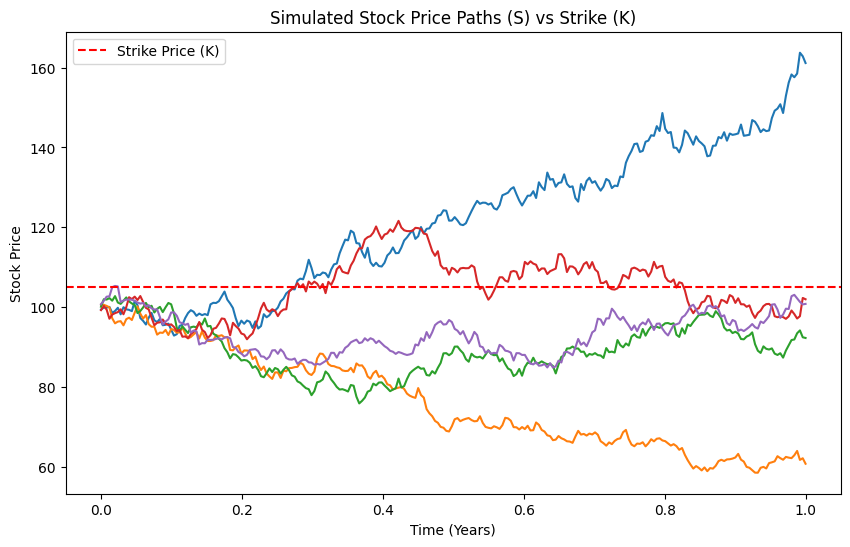

In [3]:
def simulate_stock_path(S0, T, r, sigma, steps):
    dt = T / steps
    # Generate random movements (Brownian Motion increments)
    W = np.random.standard_normal(steps) 
    W = np.cumsum(W) * np.sqrt(dt) # Cumulative sum to get the path
    
    time_steps = np.linspace(0, T, steps)
    # The Black-Scholes dynamic formula
    S_path = S0 * np.exp((r - 0.5 * sigma**2) * time_steps + sigma * W)
    
    return time_steps, S_path

# Visualizing 5 possible futures for the stock
plt.figure(figsize=(10, 6))
for i in range(5):
    t, path = simulate_stock_path(100, 1, 0.05, 0.2, 252)
    plt.plot(t, path)

plt.axhline(y=105, color='r', linestyle='--', label='Strike Price (K)')
plt.title("Simulated Stock Price Paths (S) vs Strike (K)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()